# Random Forest Model Home - Away Soccer Team Prediction
___________________________
## Seasons 2016 - 2017 Model Train Data / Season 2018 Test Data

In [3]:
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import panel as pn
from panel.interact import interact
from panel import widgets
pn.extension('plotly')

from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

%matplotlib inline

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/draganbogatic/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [4]:
''' Source: https://www.freecodecamp.org/news/how-to-combine-multiple-csv-files-with-8-lines-of-code-265183e0854/
'''
import os
#import glob

#os.chdir('premier_league/test/team_fixtures_2019')
#extension = 'csv'

In [5]:
# Reading in and printing all .csv files by season to create complete datasets per season and then create train dataset 2016-2018 seasons and test dataset 2019 season; run the code below one by one and replace the year in os.chdir code in the above cell.

#all_files_2016 = [i for i in glob.glob('*.{}'.format(extension))]

# combine all files in the list

#season_2016 = pd.concat([pd.read_csv(f) for f in all_files_2016])
# export to csv

#season_2016.to_csv("complete_2016.csv", index=False)

#all_files_2017 = [i for i in glob.glob('*.{}'.format(extension))]
#season_2017 = pd.concat([pd.read_csv(f) for f in all_files_2017])
#season_2017.to_csv("complete_2017.csv", index=False)

#all_files_2018 = [i for i in glob.glob('*.{}'.format(extension))]
#season_2018 = pd.concat([pd.read_csv(f) for f in all_files_2018])
#season_2018.to_csv("complete_2018.csv", index=False)

#all_files_2019 = [i for i in glob.glob('*.{}'.format(extension))]
#season_2019 = pd.concat([pd.read_csv(f) for f in all_files_2019])
#season_2019.to_csv("complete_2019.csv", index=False)

In [6]:
# Printed complete seasons are moved to data folder to be cleaned further; I had to use full path because VsCode would not recognize relative path; adjust it in your code

df_2016 = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/soccer_win_predict/data/complete_2016.csv')
df_2017 = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/soccer_win_predict/data/complete_2017.csv')
df_2018 = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/soccer_win_predict/data/complete_2018.csv')
df_2019 = pd.read_csv('/Users/draganbogatic/Documents/Fin_Tech/soccer_win_predict/data/complete_2019.csv')

In [7]:
# Create raw train dataset seasons 2016-2018

train_df = pd.concat([df_2016,df_2017])
train_df.head()

,Unnamed: 0,fixture_id,h_result,event_date,venue,h_team,a_team,h_halftime_score,a_haftime_score,h_fulltime_score,...,h_red_cards,a_red_cards,h_goalkeeper_saves,a_goalkeeper_saves,h_total_passes,a_total_passes,h_accurate_passes,a_accurate_passes,h_pass_percentage,a_pass_percentage
0,0,17692,0,2016-08-13T14:00:00+00:00,Selhurst Park,52,60,0,0,0,...,NaN,NaN,2.0,4.0,414,245,298,143,72%,58%
1,1,17682,2,2016-08-20T14:00:00+00:00,White Hart Lane,47,52,0,0,1,...,NaN,NaN,2.0,4.0,440,325,353,234,80%,72%
2,2,17671,1,2016-08-27T14:00:00+00:00,Selhurst Park,52,35,0,1,1,...,NaN,NaN,2.0,3.0,447,326,380,246,85%,75%
3,3,17663,0,2016-09-10T14:00:00+00:00,Riverside,70,52,1,1,1,...,NaN,NaN,2.0,3.0,526,390,450,306,86%,78%
4,4,17648,2,2016-09-18T13:15:00+00:00,Selhurst Park,52,75,2,0,4,...,NaN,NaN,3.0,3.0,459,350,376,259,82%,74%


In [8]:
# Data cleaning process: drop columns,replace NaN with 0, remove % sign, make prediction values 1 and 0 (h_result) for predictions.

train_df = train_df.drop(columns= ['Unnamed: 0','venue','fixture_id','event_date','h_fulltime_score', 'a_fulltime_score', 'h_halftime_score', 'a_haftime_score', 'h_team', 'a_team'])

train_df = train_df.replace({'%' : ''}, regex = True)

train_df = train_df.fillna(0)

train_df['h_result'] = np.where(train_df['h_result'] == 2, 1, np.where(train_df['h_result'] == 1, 0, 0))

train_df.head()

,h_result,h_shot_on_goal,a_shot_on_goal,h_shot_off_goal,a_shot_off_goal,h_total_shots,a_total_shots,h_blocked_shots,a_blocked_shots,h_shots_inside_box,...,h_red_cards,a_red_cards,h_goalkeeper_saves,a_goalkeeper_saves,h_total_passes,a_total_passes,h_accurate_passes,a_accurate_passes,h_pass_percentage,a_pass_percentage
0,0,4,3,7,8,14,13,3,2,7,...,0.0,0.0,2.0,4.0,414,245,298,143,72,58
1,1,5,2,9,6,20,10,6,2,10,...,0.0,0.0,2.0,4.0,440,325,353,234,80,72
2,0,5,3,12,4,24,10,7,3,16,...,0.0,0.0,2.0,3.0,447,326,380,246,85,75
3,0,4,4,5,4,12,12,3,4,7,...,0.0,0.0,2.0,3.0,526,390,450,306,86,78
4,1,8,4,2,6,14,11,4,1,9,...,0.0,0.0,3.0,3.0,459,350,376,259,82,74


In [9]:
# Print train dataframe to csv

#train_df.to_csv('train_data.csv')

In [10]:
train_df.shape

(1416664, 33)

In [11]:
# Create test dataframe from 2018 csv file

test_df = pd.read_csv(('/Users/draganbogatic/Documents/Fin_Tech/soccer_win_predict/data/complete_2018.csv'))
test_df.head()

,Unnamed: 0,fixture_id,h_result,event_date,venue,h_team,a_team,h_halftime_score,a_haftime_score,h_fulltime_score,...,h_red_cards,a_red_cards,h_goalkeeper_saves,a_goalkeeper_saves,h_total_passes,a_total_passes,h_accurate_passes,a_accurate_passes,h_pass_percentage,a_pass_percentage
0,0,72,2,2018-08-12T12:30:00+00:00,Anfield,40,48,2,0,4,...,NaN,NaN,2.0,4.0,673,360,606,297,90%,83%
1,1,84,0,2018-08-20T19:00:00+00:00,Selhurst Park,52,40,0,1,0,...,1.0,0.0,4.0,2.0,359,625,280,559,78%,89%
2,2,91,2,2018-08-25T16:30:00+00:00,Anfield,40,51,1,0,1,...,NaN,NaN,2.0,6.0,765,327,669,238,87%,73%
3,3,95,0,2018-09-01T11:30:00+00:00,King Power Stadium,46,40,0,2,1,...,NaN,NaN,2.0,4.0,496,473,401,374,81%,79%
4,4,105,0,2018-09-15T11:30:00+00:00,Wembley Stadium,47,40,0,1,1,...,NaN,NaN,8.0,2.0,549,356,443,267,81%,75%


In [12]:
# Perform the same cleaning process as on the train dataset

test_df = test_df.drop(columns= ['Unnamed: 0','venue','fixture_id','event_date','h_fulltime_score', 'a_fulltime_score', 'h_halftime_score', 'a_haftime_score', 'h_team', 'a_team'])

test_df = test_df.replace({'%' : ''}, regex = True)

test_df = test_df.fillna(0)

test_df['h_result'] = np.where(test_df['h_result'] == 2, 1, np.where(test_df['h_result'] == 1, 0, 0))

In [13]:
test_df.head()

,h_result,h_shot_on_goal,a_shot_on_goal,h_shot_off_goal,a_shot_off_goal,h_total_shots,a_total_shots,h_blocked_shots,a_blocked_shots,h_shots_inside_box,...,h_red_cards,a_red_cards,h_goalkeeper_saves,a_goalkeeper_saves,h_total_passes,a_total_passes,h_accurate_passes,a_accurate_passes,h_pass_percentage,a_pass_percentage
0,1,8,2,7,2,18,5,3,1,13,...,0.0,0.0,2.0,4.0,673,360,606,297,90,83
1,0,2,6,5,4,8,16,1,6,4,...,1.0,0.0,4.0,2.0,359,625,280,559,78,89
2,1,8,2,7,2,22,6,7,2,16,...,0.0,0.0,2.0,6.0,765,327,669,238,87,73
3,0,5,4,3,4,12,10,4,2,3,...,0.0,0.0,2.0,4.0,496,473,401,374,81,79
4,0,3,10,5,5,11,17,3,2,7,...,0.0,0.0,8.0,2.0,549,356,443,267,81,75


In [14]:
test_df.shape

(1520, 33)

In [15]:
#test_df.to_csv('test_data.csv')

In [16]:
# Create features dataframe

X = train_df.drop(columns=['h_result'])

X = X.astype('float')

X = X.iloc[:1520]

X.head()

,h_shot_on_goal,a_shot_on_goal,h_shot_off_goal,a_shot_off_goal,h_total_shots,a_total_shots,h_blocked_shots,a_blocked_shots,h_shots_inside_box,a_shots_inside_box,...,h_red_cards,a_red_cards,h_goalkeeper_saves,a_goalkeeper_saves,h_total_passes,a_total_passes,h_accurate_passes,a_accurate_passes,h_pass_percentage,a_pass_percentage
0,4.0,3.0,7.0,8.0,14.0,13.0,3.0,2.0,7.0,8.0,...,0.0,0.0,2.0,4.0,414.0,245.0,298.0,143.0,72.0,58.0
1,5.0,2.0,9.0,6.0,20.0,10.0,6.0,2.0,10.0,4.0,...,0.0,0.0,2.0,4.0,440.0,325.0,353.0,234.0,80.0,72.0
2,5.0,3.0,12.0,4.0,24.0,10.0,7.0,3.0,16.0,5.0,...,0.0,0.0,2.0,3.0,447.0,326.0,380.0,246.0,85.0,75.0
3,4.0,4.0,5.0,4.0,12.0,12.0,3.0,4.0,7.0,6.0,...,0.0,0.0,2.0,3.0,526.0,390.0,450.0,306.0,86.0,78.0
4,8.0,4.0,2.0,6.0,14.0,11.0,4.0,1.0,9.0,6.0,...,0.0,0.0,3.0,3.0,459.0,350.0,376.0,259.0,82.0,74.0


In [17]:
X.shape

(1520, 32)

In [18]:
y = test_df['h_result']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: h_result, dtype: int64

In [19]:
y.value_counts()

0    796
1    724
Name: h_result, dtype: int64

In [20]:
# Split the X and y into X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [21]:
# Create the StandardScaler instance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
# Fit the Standard Scaler with the training data

X_scaler = scaler.fit(X_train)

In [23]:
# Scale the training and testing data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Resample the training data with the BalancedRandomForestClassifier

from imblearn.ensemble import BalancedRandomForestClassifier

brf_model = BalancedRandomForestClassifier()

brf_model = BalancedRandomForestClassifier(bootstrap=True, class_weight=None,criterion='gini', max_depth=None, max_features='auto',max_leaf_nodes=None, min_impurity_decrease=0.0,min_samples_leaf=2, min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=128, n_jobs=1,oob_score=False, random_state=1,replacement=False,sampling_strategy='auto', verbose=0,warm_start=False)

# Fitting the BFR model

brf_model = brf_model.fit(X_train_scaled, y_train)

# Make predictions

predictions_brf = brf_model.predict(X_test_scaled)

In [25]:
# Calculate the balanced accuracy score

bal_acc_score = balanced_accuracy_score(y_test, predictions_brf)
print(f"Balanced Accuracy Score : {bal_acc_score}")

Balanced Accuracy Score : 0.6418001610261251


In [26]:
cm_brf = confusion_matrix(y_test, predictions_brf)
cm_brf_df = pd.DataFrame(cm_brf, index=["Actual 0", "Actual 1"],columns=["Predicted 0", "Predicted 1"])

display(cm_brf_df)

,Predicted 0,Predicted 1
Actual 0,129,70
Actual 1,66,115


In [27]:
print("Classification Report")
classification_report = print(classification_report_imbalanced(y_test, predictions_brf))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.66      0.65      0.64      0.65      0.64      0.41       199
          1       0.62      0.64      0.65      0.63      0.64      0.41       181

avg / total       0.64      0.64      0.64      0.64      0.64      0.41       380



In [28]:
# Print classification report to dataframe to be presented in dashboard.
'''Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format
'''

print('Classification Report')
classification_report = metrics.classification_report(y_test, predictions_brf, output_dict=True)
classification_report_df = pd.DataFrame(classification_report)
classification_report_df = classification_report_df.transpose()
classification_report_df

Classification Report


,f1-score,precision,recall,support
0,0.654822,0.661538,0.648241,199.000000
1,0.628415,0.621622,0.635359,181.000000
accuracy,0.642105,0.642105,0.642105,0.642105
macro avg,0.641619,0.641580,0.641800,380.000000
weighted avg,0.642244,0.642525,0.642105,380.000000


In [29]:
# List the features sorted in descending order by feature importance

importances = brf_model.feature_importances_
sorted(zip(brf_model.feature_importances_, X.columns), reverse=True)[:10]

[(0.04810013821422902, 'h_accurate_passes'),
 (0.04666782359762534, 'h_total_passes'),
 (0.044189413144872174, 'a_total_passes'),
 (0.03944067426210459, 'h_pass_percentage'),
 (0.03927389597668354, 'a_accurate_passes'),
 (0.03804805611499009, 'a_total_shots'),
 (0.03754267088918516, 'a_ball_possession'),
 (0.037237171777494416, 'h_ball_possession'),
 (0.03653010460876491, 'h_total_shots'),
 (0.03628095069729653, 'h_fouls')]

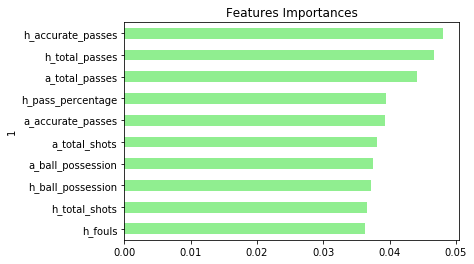

In [30]:
# Visualize the features by importance

importances_df = pd.DataFrame(sorted(zip(brf_model.feature_importances_,    X.columns), reverse=True))[:10]
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)

importances_sorted = importances_df.sort_values(by=
'Feature Importances')

importances_plot = importances_sorted.plot(kind='barh', color='lightgreen', title='Features Importances', legend=False)

In [31]:
# Create panel dashboard

score_column = pn.Column('## Balanced Accuracy Score', bal_acc_score)

matrix_column = pn.Column('## Confusion Matrix', cm_brf_df)

classification_column = pn.Column('## Classification Report',classification_report_df)

features_column = pn.Column('## Most Important Features', importances_plot)

In [32]:
nba_random_forest_predict_dashbord = pn.Tabs(
("Balanced Accuracy Score", score_column),
("Confusion Matrix", matrix_column),
("Classification Report", classification_column),
("Most Important Features", features_column))

In [33]:
# Display dashboard

nba_random_forest_predict_dashbord.servable()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Str(float64)
    [1] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [2] Column
        [0] Markdown(str)
        [1] DataFrame(DataFrame)
    [3] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)

_____________________
# Alternative Classification Models 
_____________________

# Easy Ensamble Classifier

In [39]:
# Run Easy Ensable Classifier
from imblearn.ensemble import EasyEnsembleClassifier

eec_model = EasyEnsembleClassifier()

EasyEnsembleClassifier(base_estimator=None, n_estimators=100, n_jobs=1,random_state=1, replacement=False, sampling_strategy='auto',verbose=0, warm_start=False)

eec_model = eec_model.fit(X_train_scaled, y_train)

predictions_eec = eec_model.predict(X_test_scaled)

In [40]:
# Calculated the balanced accuracy score

bal_acc_score_eec = balanced_accuracy_score(y_test, predictions_eec)
print(f"Balanced Accuracy Score : {bal_acc_score_eec}")

Balanced Accuracy Score : 0.608900857880563


In [41]:
# Print the imbalanced classification report

print("Classification Report")
print(classification_report_imbalanced(y_test, predictions_eec))

Classification Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.62      0.64      0.57      0.63      0.61      0.37       199
          1       0.59      0.57      0.64      0.58      0.61      0.37       181

avg / total       0.61      0.61      0.61      0.61      0.61      0.37       380



# SMOTEENN Model

In [42]:
# Run Smoteenn Model

from imblearn.combine import SMOTEENN

smten = SMOTEENN(random_state=1)
X_resampled_smten, y_resampled_smten = smten.fit_resample(X_train_scaled, y_train)

Counter(y_resampled_smten)

Counter({0: 176, 1: 172})

In [48]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model using the resampled data
model = LogisticRegression()
model.fit(X_resampled_smten, y_resampled_smten)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, l1_ratio=None, max_iter=100,multi_class='warn', n_jobs=None, penalty='l2',random_state=1, solver='warn', tol=0.0001, verbose=0,warm_start=False)

LogisticRegression(multi_class='warn', random_state=1, solver='warn')

In [49]:
# Calculated the balanced accuracy score

y_pred_smten = model.predict(X_test_scaled)
balanced_accuracy_score(y_test, y_pred_smten)

0.4908381687442739

In [50]:
# Display the confusion matrix

confusion_matrix(y_test, y_pred_smten)

array([[103,  96],
       [ 97,  84]])

In [51]:
# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, y_pred_smten))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.52      0.52      0.46      0.52      0.49      0.24       199
          1       0.47      0.46      0.52      0.47      0.49      0.24       181

avg / total       0.49      0.49      0.49      0.49      0.49      0.24       380

